In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix

In [5]:
# Importing the data .
data = pd.read_csv('data/breast_cancer.csv')

In [6]:
# Test missing data .
data.isnull().sum()

569            0
30             0
malignant      0
benign         0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
Unnamed: 10    0
Unnamed: 11    0
Unnamed: 12    0
Unnamed: 13    0
Unnamed: 14    0
Unnamed: 15    0
Unnamed: 16    0
Unnamed: 17    0
Unnamed: 18    0
Unnamed: 19    0
Unnamed: 20    0
Unnamed: 21    0
Unnamed: 22    0
Unnamed: 23    0
Unnamed: 24    0
Unnamed: 25    0
Unnamed: 26    0
Unnamed: 27    0
Unnamed: 28    0
Unnamed: 29    0
Unnamed: 30    0
dtype: int64

In [7]:
# Features Selection using correlation method.
corr = data.corr()

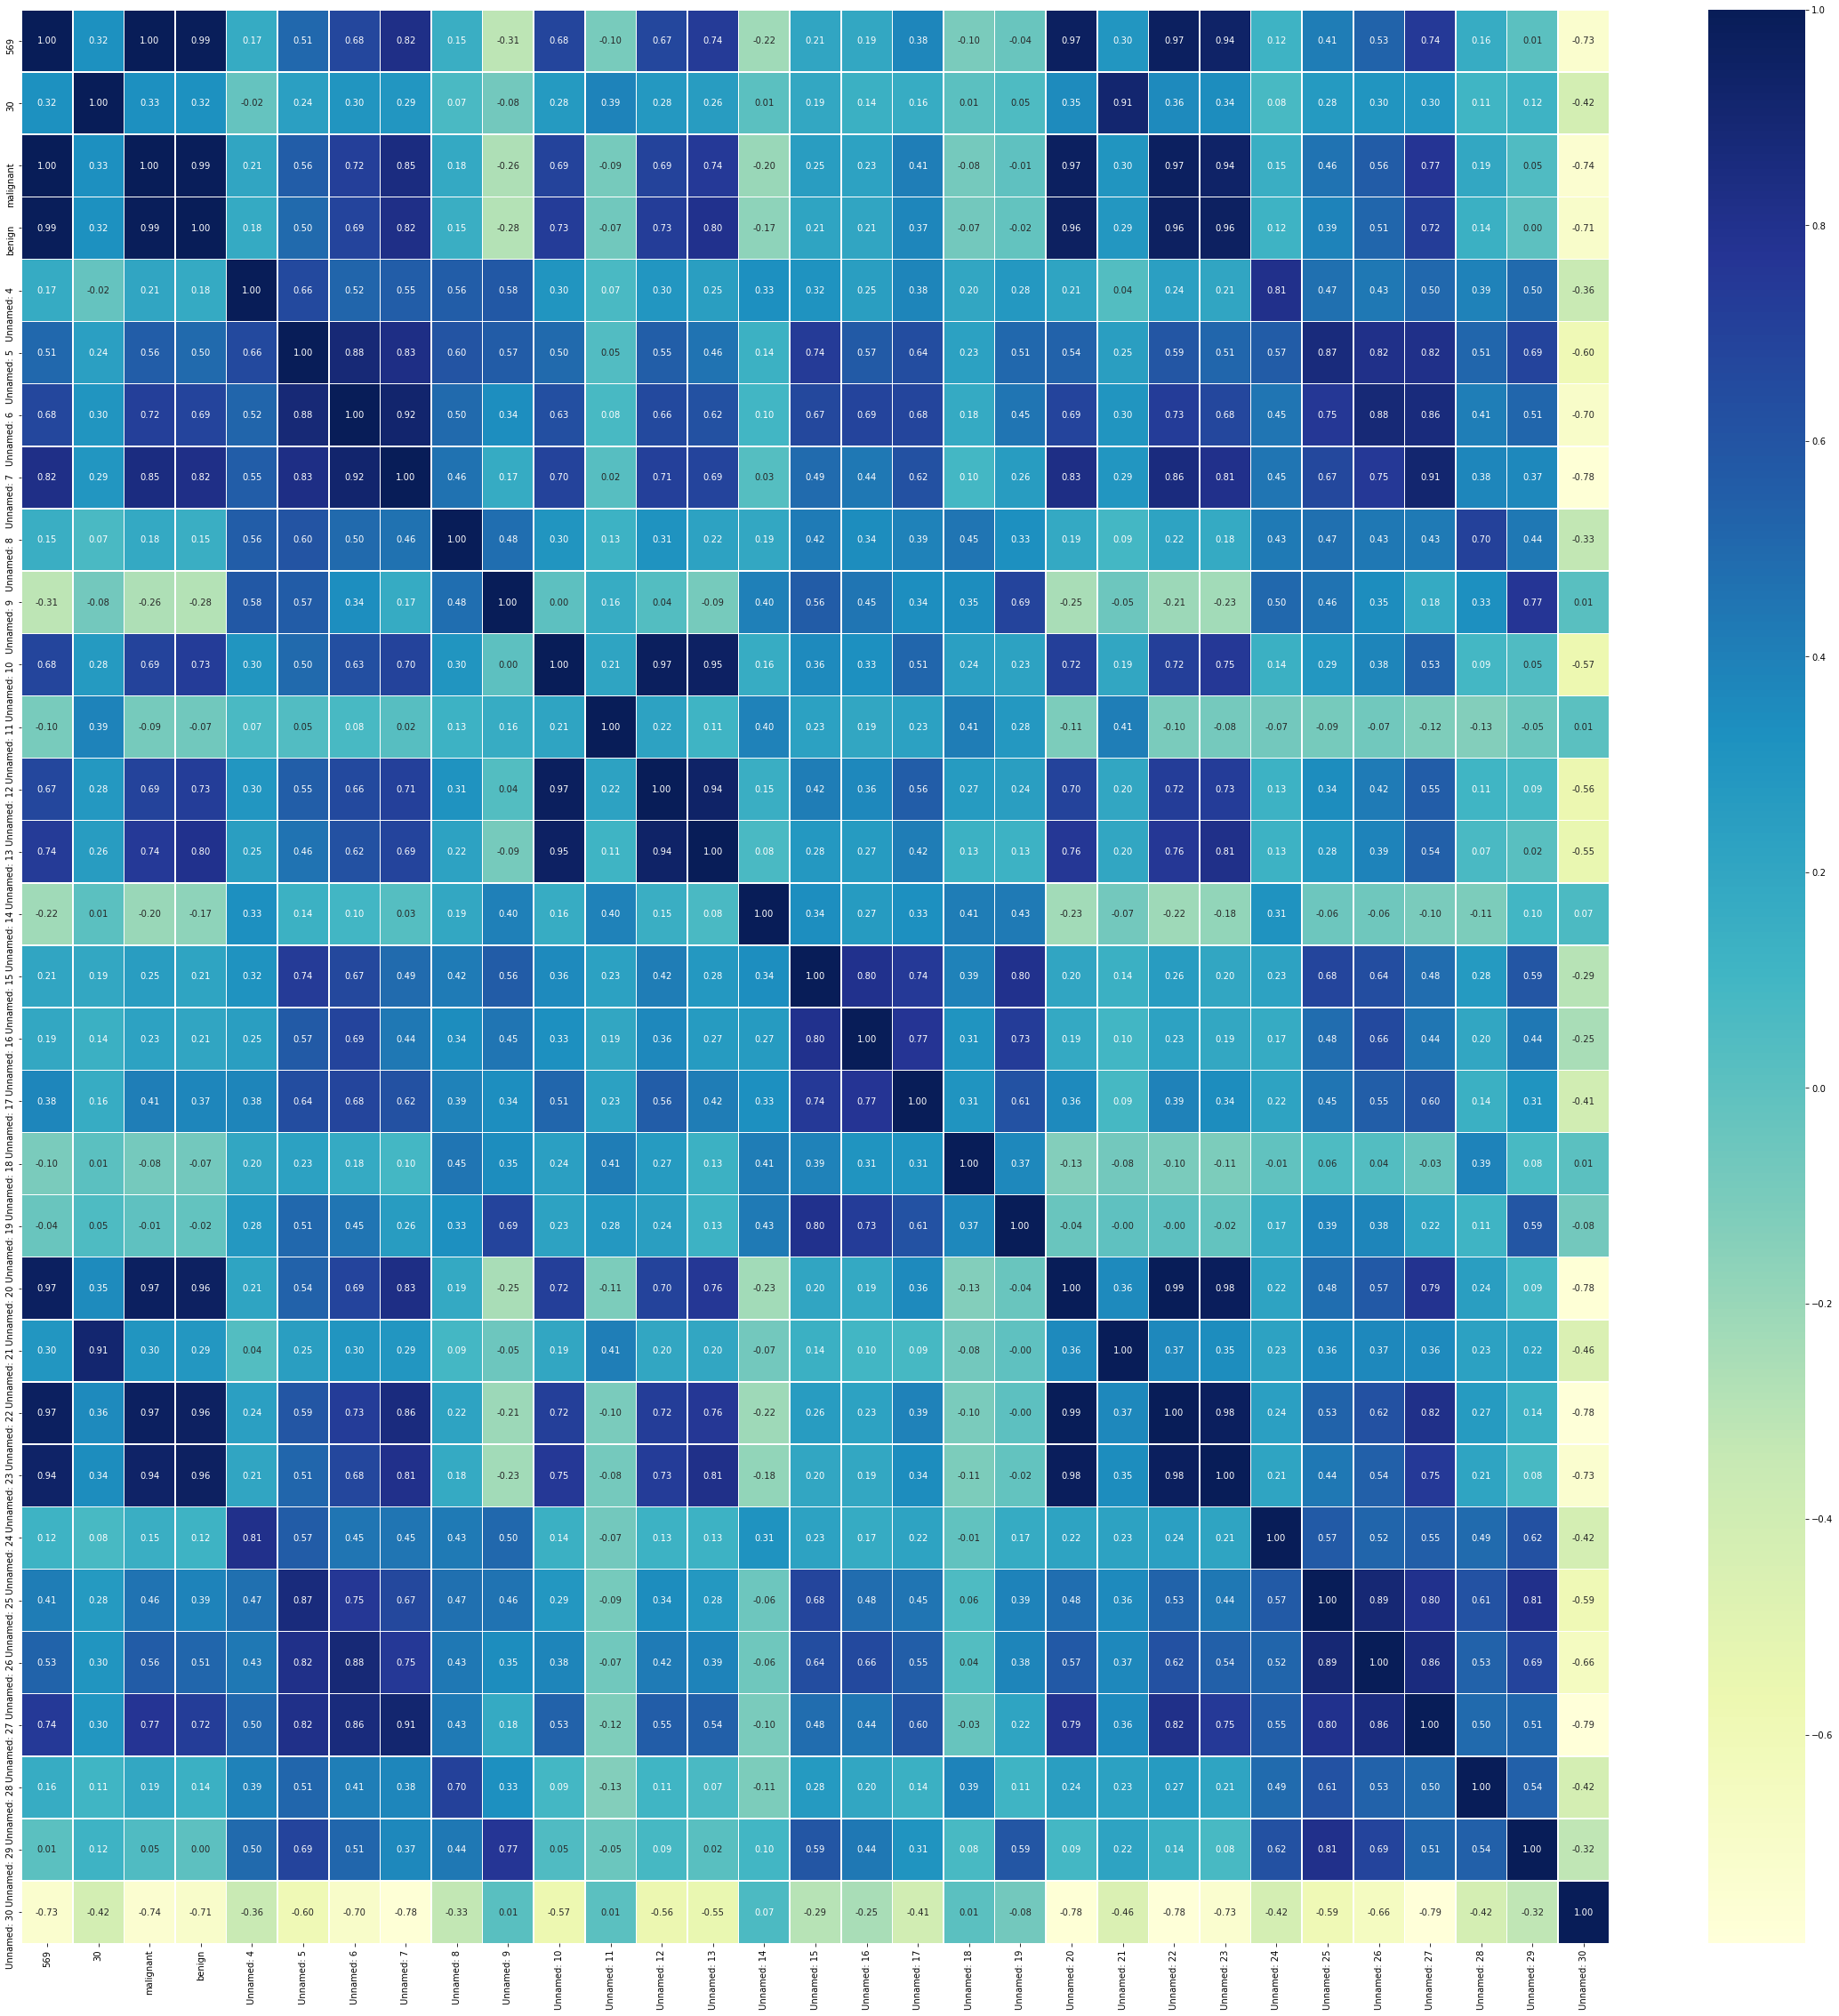

In [8]:
# Visualise the full data
fig , ax = plt.subplots(figsize = (40 ,40 ))
ax = sns.heatmap(corr ,
                  annot = True ,
                  linewidths=0.5 ,
                  fmt= '0.2f' ,
                  cmap = 'YlGnBu')

In [9]:
# drop the columns innessesary .
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

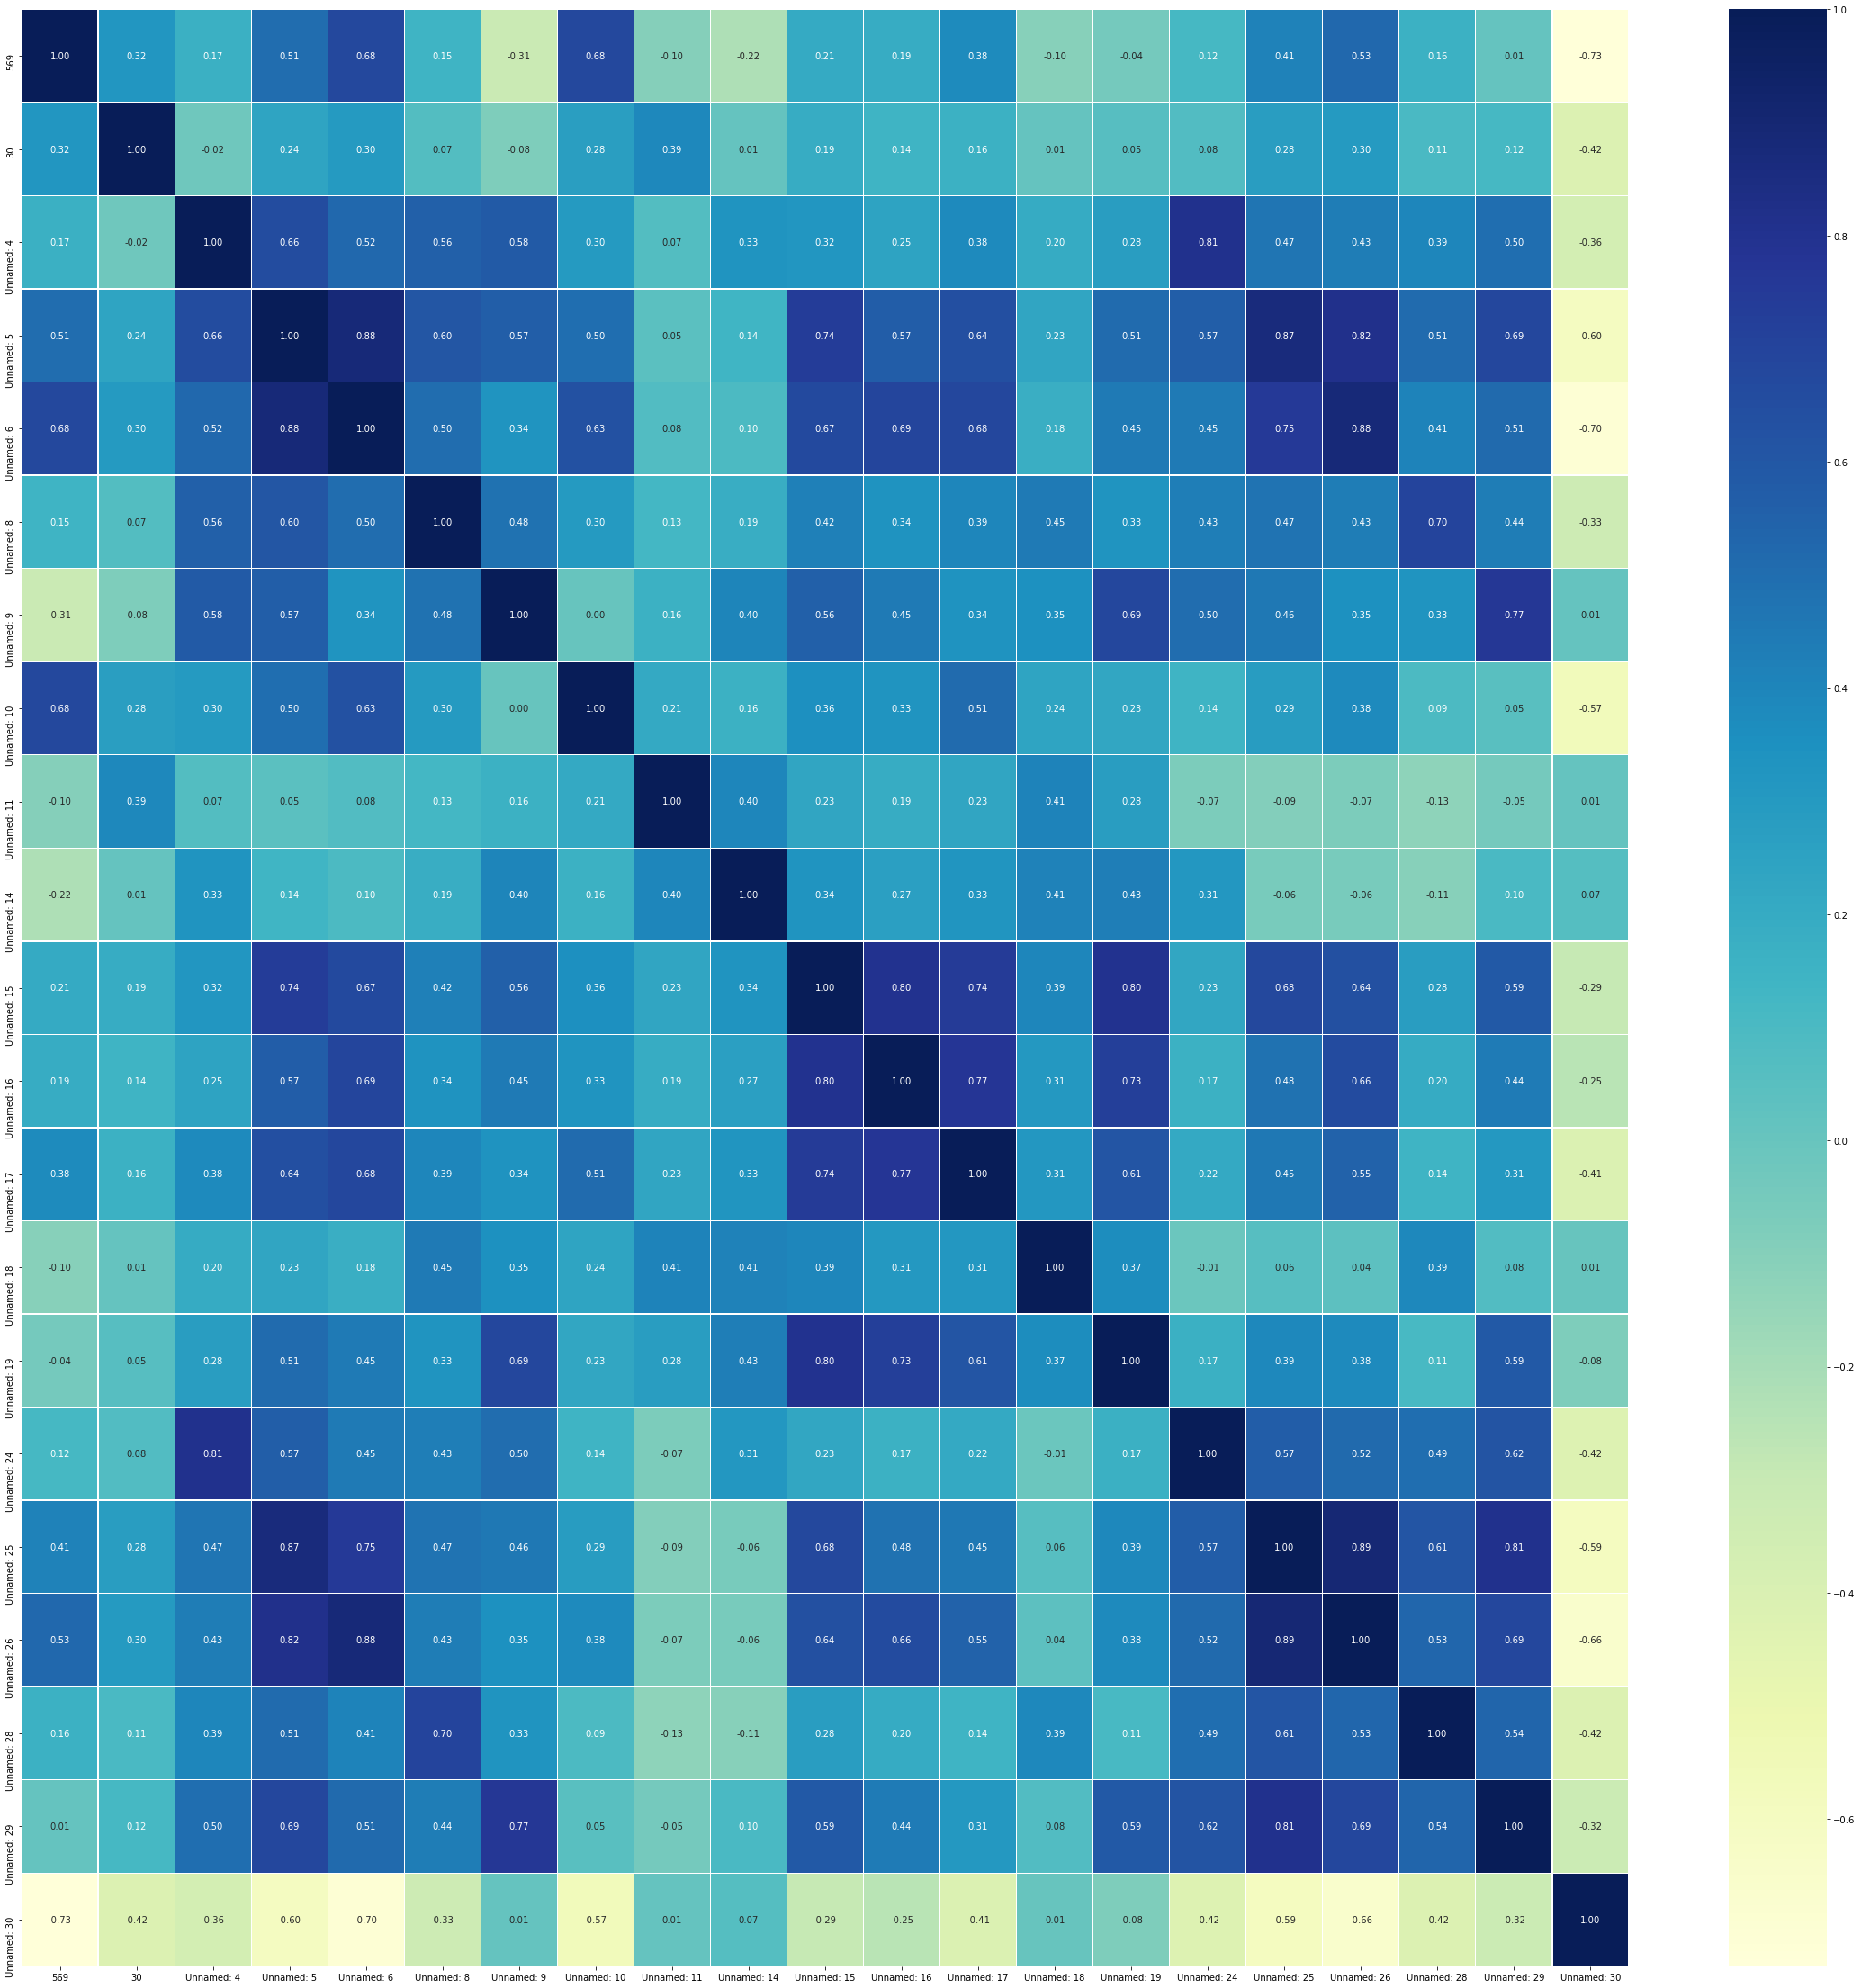

In [10]:
# Visualise the New data
corr2 = data.corr()
fig , ax2 = plt.subplots(figsize = (40 , 40 ))
ax2 = sns.heatmap(corr2 ,
                  annot = True ,
                  linewidths=0.5 ,
                  fmt= '0.2f' ,
                  cmap = 'YlGnBu')

In [11]:
# Spliting Dataset to Features and Target
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [16]:
# Spliting Dataset to Training and Testing
X_train , X_test , y_train , y_test = train_test_split(X ,
                                                        y ,
                                                        test_size=0.3 ,
                                                        shuffle = True ,
                                                        random_state = 42)

In [17]:
# Scalling the columns data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Fitting Training Data and Predict the Results .
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {'Logestic_Regression' : LogisticRegression() ,
          'KNN' : KNeighborsClassifier() ,
          'Random_Forest_Classifier' : RandomForestClassifier() ,
          'SVC' : SVC()
          }
def fit_and_score(models , X_train , X_test , y_train , y_test) :
    model_scores = {}
    model_confusion = {}
    for name , model in models.items() :
        # fitting the data :
        model.fit(X_train , y_train)
        model_scores[name] = model.score(X_test , y_test)
        y_predict = model.predict(X_test)
        model_confusion[name] = confusion_matrix(y_test , y_predict)
    return model_scores , model_confusion

In [19]:
fit_and_score( models = models ,
               X_train = X_train , X_test = X_test ,
               y_train = y_train , y_test = y_test
             )

({'Logestic_Regression': 0.9766081871345029,
  'KNN': 0.9415204678362573,
  'Random_Forest_Classifier': 0.9649122807017544,
  'SVC': 0.9415204678362573},
 {'Logestic_Regression': array([[ 62,   1],
         [  3, 105]], dtype=int64),
  'KNN': array([[ 58,   5],
         [  5, 103]], dtype=int64),
  'Random_Forest_Classifier': array([[ 60,   3],
         [  3, 105]], dtype=int64),
  'SVC': array([[ 57,   6],
         [  4, 104]], dtype=int64)})